# Pipeline accident cost prediction

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib as plt

# handle error messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = './database.csv'
df = pd.read_csv(path,delimiter=',')
print(df.shape)
print(df.info())

(2795, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                   

# Variables selection

In [3]:
# Remove columns whose data is more than 90% NaNs
mask = df.apply(lambda x: x.isna().sum()/len(x) < 0.9)
mask = [mask[c] for c in range(len(mask))]
df_reduced = df.loc[:, mask]

# Number of columns reduced from 48 to 35
print(df_reduced.shape)
df_reduced.T

(2795, 35)


,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
Report Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,...,20170020,20170022,20170021,20170023,20170026,20170015,20170028,20170027,20170024,20170025
Supplemental Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,...,22026,22029,22027,22030,22044,22020,22046,22045,22032,22040
Accident Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,...,12/21/2016 11:40 AM,12/22/2016 9:25 PM,12/23/2016 3:00 PM,12/24/2016 9:35 AM,12/26/2016 7:20 AM,12/27/2016 8:40 AM,12/28/2016 4:20 PM,12/29/2016 6:40 AM,1/3/2017 10:00 AM,1/9/2017 7:40 AM
Operator ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,...,32147,32080,30829,31684,32011,32334,4906,39145,32147,30829
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,...,MARATHON PIPE LINE LLC,"CCPS TRANSPORTATION, LLC",ENTERPRISE CRUDE PIPELINE LLC,PHILLIPS 66 PIPELINE LLC,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",TC OIL PIPELINE OPERATIONS INC,EXXONMOBIL PIPELINE CO,ENBRIDGE STORAGE (CUSHING) L.L.C.,MARATHON PIPE LINE LLC,ENTERPRISE CRUDE PIPELINE LLC
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL,RED RIVER EAST,NaN,NaN,HULL STATION,NaN,TANK 1501,...,ELWOOD STATION,LINE 59 KEY STATION,ECHO MANIFOLD,"NT-90, PREDO TO CARSON",RUSSELL STATION,KEYSTONE,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,CUSHING CENTRAL TERMINAL,MIDLAND STATION,MARSHALL STATION
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,...,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,...,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,TANK,UNDERGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


'Shutdown duration' column creation

In [4]:
# Shutdown duration column creation
# Problem : only 1341 values
df_reduced['Shutdown Duration'] = (pd.to_datetime(df_reduced['Restart Date/Time']) - pd.to_datetime(df_reduced['Shutdown Date/Time']))\
.astype('timedelta64[h]')
df = df_reduced.fillna({'Shutdown Duration': 0}) # change nans into 0

# Statistics of Shutdown Duration
print(df['Shutdown Duration'].describe()) # hours

count     2795.000000
mean        90.337746
std        626.831444
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max      16746.000000
Name: Shutdown Duration, dtype: float64


In [5]:
'''
Notice: Net loss (Barrels) discloses some non-integer figures (0,89 ; 4,16 ; ...)
        Shutdown Duration has 1341 values only
'''
print(df.shape)
df.T

(2795, 36)


,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
Report Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,...,20170020,20170022,20170021,20170023,20170026,20170015,20170028,20170027,20170024,20170025
Supplemental Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,...,22026,22029,22027,22030,22044,22020,22046,22045,22032,22040
Accident Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,...,12/21/2016 11:40 AM,12/22/2016 9:25 PM,12/23/2016 3:00 PM,12/24/2016 9:35 AM,12/26/2016 7:20 AM,12/27/2016 8:40 AM,12/28/2016 4:20 PM,12/29/2016 6:40 AM,1/3/2017 10:00 AM,1/9/2017 7:40 AM
Operator ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,...,32147,32080,30829,31684,32011,32334,4906,39145,32147,30829
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,...,MARATHON PIPE LINE LLC,"CCPS TRANSPORTATION, LLC",ENTERPRISE CRUDE PIPELINE LLC,PHILLIPS 66 PIPELINE LLC,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",TC OIL PIPELINE OPERATIONS INC,EXXONMOBIL PIPELINE CO,ENBRIDGE STORAGE (CUSHING) L.L.C.,MARATHON PIPE LINE LLC,ENTERPRISE CRUDE PIPELINE LLC
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL,RED RIVER EAST,NaN,NaN,HULL STATION,NaN,TANK 1501,...,ELWOOD STATION,LINE 59 KEY STATION,ECHO MANIFOLD,"NT-90, PREDO TO CARSON",RUSSELL STATION,KEYSTONE,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,CUSHING CENTRAL TERMINAL,MIDLAND STATION,MARSHALL STATION
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,...,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,...,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,TANK,UNDERGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


# Data visualization

In [6]:
# Top 10 accidents by the amount of All Costs
print(df['All Costs'].sort_values(ascending=False).head(10))

# Statistics of All Costs
print(df['All Costs'].describe())

194     840526118
2103    142931884
523     135000000
1173     91300000
2675     66234072
241      47393566
457      35728903
160      32233740
133      28938000
1833     24323483
Name: All Costs, dtype: int64
count    2.795000e+03
mean     8.340332e+05
std      1.657830e+07
min      0.000000e+00
25%      5.039500e+03
50%      2.312900e+04
75%      1.172325e+05
max      8.405261e+08
Name: All Costs, dtype: float64


In [7]:
df["Liquid Ignition"].value_counts(), df["Liquid Explosion"].value_counts()

(NO     2700
 YES      95
 Name: Liquid Ignition, dtype: int64, NO     2780
 YES      15
 Name: Liquid Explosion, dtype: int64)

In [8]:
# Some Operator IDs have multiple Operator Names due to M&A etc.
print("Number of distinct Operator ID:", len(df['Operator ID'].unique()))
print("Number of distinct Operator Name:", len(df['Operator Name'].unique()))

Number of distinct Operator ID: 213
Number of distinct Operator Name: 229


In [9]:
df['Cause Category'].value_counts(), df['Cause Category'].describe()

(MATERIAL/WELD/EQUIP FAILURE    1435
 CORROSION                       592
 INCORRECT OPERATION             378
 ALL OTHER CAUSES                118
 NATURAL FORCE DAMAGE            118
 EXCAVATION DAMAGE                97
 OTHER OUTSIDE FORCE DAMAGE       57
 Name: Cause Category, dtype: int64, count                            2795
 unique                              7
 top       MATERIAL/WELD/EQUIP FAILURE
 freq                             1435
 Name: Cause Category, dtype: object)

In [10]:
df["Pipeline Type"].value_counts(), df['Pipeline Type'].describe()

(ABOVEGROUND        1475
 UNDERGROUND         985
 TANK                301
 TRANSITION AREA      16
 Name: Pipeline Type, dtype: int64, count            2777
 unique              4
 top       ABOVEGROUND
 freq             1475
 Name: Pipeline Type, dtype: object)

In [11]:
df["Liquid Type"].value_counts(), df["Liquid Type"].describe()

(CRUDE OIL                                               1398
 REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
 HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
 CO2 (CARBON DIOXIDE)                                      38
 BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
 Name: Liquid Type, dtype: int64, count          2795
 unique            5
 top       CRUDE OIL
 freq           1398
 Name: Liquid Type, dtype: object)

In [12]:
print(df.groupby(['Accident Year'])['All Costs'].mean())
print(df.groupby(['Accident Year'])['All Costs'].count())

Accident Year
2010    3.071983e+06
2011    7.928306e+05
2012    3.968509e+05
2013    6.945774e+05
2014    2.900540e+05
2015    5.491256e+05
2016    4.172569e+05
2017    4.361400e+04
Name: All Costs, dtype: float64
Accident Year
2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: All Costs, dtype: int64


In [13]:
print(pd.crosstab(df['Liquid Ignition'], df['Liquid Explosion']))

Liquid Explosion    NO  YES
Liquid Ignition            
NO                2700    0
YES                 80   15


In [14]:
print(df.groupby(['Liquid Ignition'])['All Costs'].mean())
print(df.groupby(['Liquid Explosion'])['All Costs'].mean())
print(df.groupby(['Liquid Ignition'])['All Costs'].max())
print(df.groupby(['Liquid Explosion'])['All Costs'].max())

Liquid Ignition
NO     842947.114444
YES    580691.726316
Name: All Costs, dtype: float64
Liquid Explosion
NO     8.324311e+05
YES    1.130972e+06
Name: All Costs, dtype: float64
Liquid Ignition
NO     840526118
YES     10262149
Name: All Costs, dtype: int64
Liquid Explosion
NO     840526118
YES      6910591
Name: All Costs, dtype: int64


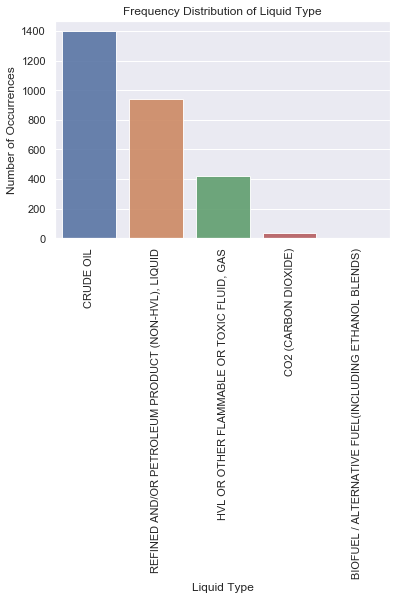

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
Liquid_Type_count = df['Liquid Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Liquid_Type_count.index, Liquid_Type_count.values, alpha=0.9, errwidth=0.1)
plt.title('Frequency Distribution of Liquid Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Liquid Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Text(0.5,1,'Pipeline Type')

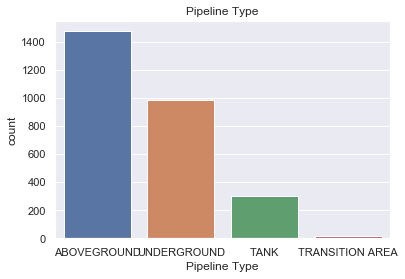

In [16]:
sns.countplot(df['Pipeline Type'])
plt.title('Pipeline Type')

Text(0.5,1,'Total costs per Pipeline Type')

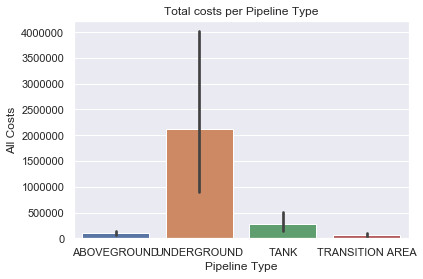

In [17]:
# Which Pipeline Type has highest cost
df_PipeLine_Type_All_Cost = df[['Pipeline Type','All Costs']]
sns.barplot(x='Pipeline Type', y="All Costs",  data=df_PipeLine_Type_All_Cost)
plt.title('Total costs per Pipeline Type')
# ==> outliers are underground pipelines

Text(0.5,1,'# Net Loss (Barrels)')

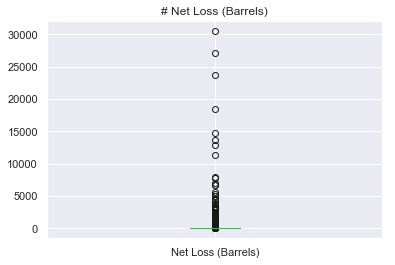

In [18]:
df.boxplot(column='Net Loss (Barrels)')
plt.title('# Net Loss (Barrels)')

# Outliers identification and costs structure plots

(2795, 36)


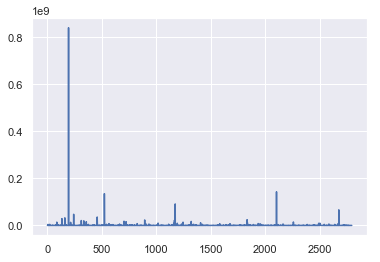

In [19]:
df['All Costs'].plot() # ==> 5 outliers identified
print(df.shape)

In [20]:
df['All Costs'].sort_values(ascending=False)[:10]

194     840526118
2103    142931884
523     135000000
1173     91300000
2675     66234072
241      47393566
457      35728903
160      32233740
133      28938000
1833     24323483
Name: All Costs, dtype: int64

Text(0.5,0,'Index')

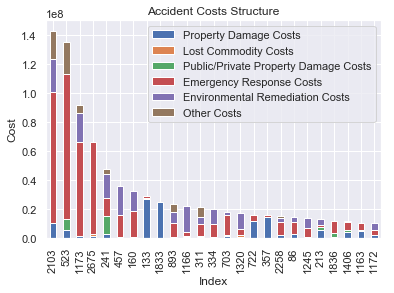

In [21]:
b = df['All Costs'].sort_values(ascending=False) [:30]
top25 = df.iloc[b.index[1:26], 28:-2] # except index 194: outlier 1
top25.plot.bar(stacked=True)
plt.title('Accident Costs Structure')
plt.ylabel('Cost', fontsize=12)
plt.xlabel('Index', fontsize=12)

In [22]:
print('Property Damage Costs:                ', "{:,}".format(df['Property Damage Costs'].sum()))
print('Environmental Remediation Costs:      ', "{:,}".format(df['Environmental Remediation Costs'].sum()))
print('Emergency Response Costs:             ', "{:,}".format(df['Emergency Response Costs'].sum()))
print('Lost Commodity Costs:                 ', "{:,}".format(df['Lost Commodity Costs'].sum()))
print('Public/Private Property Damage Costs: ', "{:,}".format(df['Public/Private Property Damage Costs'].sum()))
print('All Costs:                            ', "{:,}".format(df['All Costs'].sum()))

Property Damage Costs:                 313,081,992.0
Environmental Remediation Costs:       1,011,149,910.0
Emergency Response Costs:              814,084,371.0
Lost Commodity Costs:                  27,366,589.0
Public/Private Property Damage Costs:  69,964,627.0
All Costs:                             2,331,122,923


# New dataset and correlation matrix

In [36]:
# Select columns to be used for prediction
s = pd.Series([4, 8,9,16,22,23,34,21,35])

# Highlight the selected columns
for col in range(len(df.columns)):
    if col in list(s):
        print("\033[31m" + str(col), df.columns[col] + "\033[0m")
    else:
        print(col, df.columns[col])

0 Report Number
1 Supplemental Number
2 Accident Year
3 Accident Date/Time
4 Operator ID
5 Operator Name
6 Pipeline/Facility Name
7 Pipeline Location
8 Pipeline Type
9 Liquid Type
10 Liquid Subtype
11 Accident City
12 Accident County
13 Accident State
14 Accident Latitude
15 Accident Longitude
16 Cause Category
17 Cause Subcategory
18 Unintentional Release (Barrels)
19 Intentional Release (Barrels)
20 Liquid Recovery (Barrels)
21 Net Loss (Barrels)
22 Liquid Ignition
23 Liquid Explosion
24 Pipeline Shutdown
25 Shutdown Date/Time
26 Restart Date/Time
27 Public Evacuations
28 Property Damage Costs
29 Lost Commodity Costs
30 Public/Private Property Damage Costs
31 Emergency Response Costs
32 Environmental Remediation Costs
33 Other Costs
34 All Costs
35 Shutdown Duration


In [38]:
newdf = df[df.columns[s[:,]]].copy()
print(newdf.shape)
newdf.head()

(2795, 9)


,Operator ID,Pipeline Type,Liquid Type,Cause Category,Liquid Ignition,Liquid Explosion,All Costs,Net Loss (Barrels),Shutdown Duration
0,32109,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",INCORRECT OPERATION,NO,NO,1627,21.0,0.0
1,15786,ABOVEGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,NO,NO,4008,0.0,0.0
2,20160,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MATERIAL/WELD/EQUIP FAILURE,NO,NO,200,2.0,0.0
3,11169,UNDERGROUND,CRUDE OIL,NATURAL FORCE DAMAGE,NO,NO,11540,0.0,0.0
4,300,UNDERGROUND,CRUDE OIL,EXCAVATION DAMAGE,NO,NO,29650,2.0,0.0


In [39]:
newdf.cov() # Covariance matrix is not easily readable!

,Operator ID,All Costs,Net Loss (Barrels),Shutdown Duration
Operator ID,1.545291e+08,-6.160399e+09,5.834308e+05,3.108264e+04
All Costs,-6.160399e+09,2.748400e+14,1.216508e+09,6.666732e+08
Net Loss (Barrels),5.834308e+05,1.216508e+09,1.404271e+06,4.949745e+04
Shutdown Duration,3.108264e+04,6.666732e+08,4.949745e+04,3.929177e+05


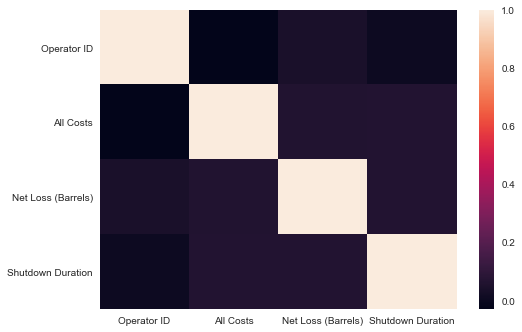

In [40]:
corr = newdf.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# One-hot encoding & Value replacement

In [41]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

# One-hot encoding
Pipeline_Type_dum = pd.get_dummies(newdf['Pipeline Type'], prefix='Pipeline Type')
newdf = pd.concat([newdf, Pipeline_Type_dum], axis=1)
newdf = newdf.drop(['Pipeline Type'], axis=1)

Liquid_Type_dum = pd.get_dummies(newdf['Liquid Type'], prefix='Liquid Type')
newdf = pd.concat([newdf, Liquid_Type_dum], axis=1)
newdf = newdf.drop(['Liquid Type'], axis=1)

Cause_Category_dum = pd.get_dummies(newdf['Cause Category'], prefix='Cause Category')
newdf = pd.concat([newdf, Cause_Category_dum], axis=1)
newdf = newdf.drop(['Cause Category'], axis=1)

Ignition_dum = pd.get_dummies(newdf['Liquid Ignition'], prefix='Liquid Ignition').replace({0:1, 1:0})
newdf = pd.concat([newdf, Ignition_dum], axis=1)
newdf = newdf.drop(['Liquid Ignition'], axis=1)

Explosion_dum = pd.get_dummies(newdf['Liquid Explosion'], prefix='Liquid Explosion').replace({0:1, 1:0})
newdf = pd.concat([newdf, Explosion_dum], axis=1)
newdf = newdf.drop(['Liquid Explosion'], axis=1)

Operator_ID_dum = pd.get_dummies(newdf['Operator ID'], prefix='Operator ID')
newdf = pd.concat([newdf, Operator_ID_dum], axis=1)
newdf = newdf.drop(['Operator ID'], axis=1)

print(newdf.shape)
newdf.T

(2795, 236)


,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
All Costs,1627.0,4008.0,200.0,11540.0,29650.0,4194715.0,70400.0,413.00,40336.0,30050.0,...,66041.0,47047.0,65075.0,258510.0,13120.0,61015.0,105400.0,15050.0,41428.0,45800.0
Net Loss (Barrels),21.0,0.0,2.0,0.0,2.0,2237.0,5.0,0.24,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,580.0,0.0,0.0,0.0
Shutdown Duration,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.00,0.0,0.0,...,18.0,4.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0
Pipeline Type_ABOVEGROUND,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
Pipeline Type_TANK,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pipeline Type_TRANSITION AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pipeline Type_UNDERGROUND,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Liquid Type_BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liquid Type_CO2 (CARBON DIOXIDE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liquid Type_CRUDE OIL,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.00,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


# Modelling and regression

In [42]:
%matplotlib inline
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
import math
import sklearn.metrics as metrics

count    2795.000000
mean       10.006837
std         2.629996
min         0.000000
25%         8.525062
50%        10.048843
75%        11.671913
max        20.549539
Name: Log All Costs, dtype: float64


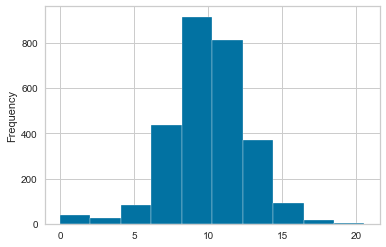

In [43]:
dataframe = newdf.copy()

# Take logarithm of All Cost to avoid scaling problem
y_log = np.log(dataframe['All Costs'])
y_log = y_log.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace -inf with 0
dataframe['Log All Costs'] = y_log

print(dataframe['Log All Costs'].describe())
dataframe['Log All Costs'].plot(kind='hist')

In [44]:
# Extract the X and y data from the dataframe
l = len(newdf.columns)
X = dataframe.iloc[:,1:l]
print("Shape of X:", X.shape)
y = dataframe['Log All Costs']

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3) # seems to be the sample optimal test size

Shape of X: (2795, 235)


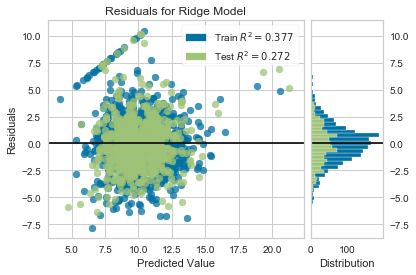

In [45]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# Extract columnson train X
X2= X
y2= y

# Model creation and fit
model1 = BaggingClassifier(KNeighborsClassifier())
model1.fit(X2,y2)

# Show model results of training set
y2_hat = model1.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET")
print ("=========================================")
print ("MAE:         ", mae)
print ("MSE:         ", math.sqrt(mse))
print ("r2:          ", model1.score(X2,y2))
print ("n_features:  ", model1.n_features_)

# Show model results of test set
y_hat_test = model1.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat_test)
mse = metrics.mean_squared_error(y_test,y_hat_test)
print ("TEST SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model1.score(X_test,y_test))
print ("r2 retry:           ", r2_score(y_test, y_hat_test))
print ("n_features:         ", model1.n_features_)

In [ ]:
# AdaBoost
model2 = AdaBoostClassifier(n_estimators=50)
scores = cross_val_score(model2, X2, y2, cv=5) # Cross-Validation
scores.mean() 

In [47]:
# Extract columnson train X
X2= X
y2= y

# Model creation and fit
model3 = RandomForestRegressor()
model3.fit(X2,y2)

# Show model results of training set
y2_hat = model3.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("MSE:                ", math.sqrt(mse))
print ("r2:                 ", model3.score(X2,y2))
print ("n_features:         ", model3.n_features_)
print ("n_outputs:          ", model3.n_outputs_)

# Show model results of test set
y_hat_test = model3.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat_test)
mse = metrics.mean_squared_error(y_test,y_hat_test)
print ("\nTEST SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model3.score(X_test,y_test))
print ("r2 retry:           ", r2_score(y_test, y_hat_test))
print ("n_features:         ", model3.n_features_)
print ("n_outputs:          ", model3.n_outputs_)

TRAINING SET
MAE:                 0.7231847191863896
MSE:                 1.1027356143714977
r2:                  0.8241315308745147
n_features:          235
n_outputs:           1

TEST SET
MAE:                 0.7178782633958437
RMSE:                1.1179201152457996
r2:                  0.816435120138486
r2 retry:            0.8164351201384861
n_features:          235
n_outputs:           1


# Conclusion